<a href="https://www.kaggle.com/code/emdogan/enhanced-pii-data-classification-eda?scriptVersionId=163703894" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<div style="background-color:purple; color:white; padding:10px; border-radius: 5px;">
  <p><span style="display: inline;">This notebook was copied from <a href="https://www.kaggle.com/code/prokaggler22/pii-data-classification-eda" style="color: white; text-decoration: underline;" target="_blank">@PROKAGGLER22's notebook</a></span></p>
  <ul>
    <li>added Visualization of lengths </li>
    <li>added detailed information</li>
    <li>added Text length</li>
    <li>added Relationships between text length and number of tags</li>
  </ul>
</div>


### PII Types
Seven Labels to classify from the following types of PII:

- `NAME_STUDENT` - The full or partial name of a student that is not necessarily the author of the essay. This excludes instructors, authors, and other person names.
-`EMAIL` - A student’s email address.
-`USERNAME` - A student's username on any platform.
-`ID_NUM` - A number or sequence of characters that could be used to identify a student, such as a student ID or a social security number.
-`PHONE_NUM` - A phone number associated with a student.
-`URL_PERSONAL` - A URL that might be used to identify a student.
-`STREET_ADDRESS` - A full or partial street address that is associated with the student, such as their home address.

### Token labels are presented in BIO (Beginning, Inner, Outer) format. The PII type is prefixed with “B-” when it is the beginning of an entity. If the token is a continuation of an entity, it is prefixed with “I-”. Tokens that are not PII are labeled “O”.

In [1]:
import numpy as np 
import pandas as pd 
from colorama import Fore, Back, Style
import os
from collections import Counter
import matplotlib.pyplot as plt
plt.rcParams["figure.autolayout"] = True
%matplotlib inline

In [2]:
train_df = pd.read_json( '/kaggle/input/pii-detection-removal-from-educational-data/train.json')
test_df = pd.read_json( '/kaggle/input/pii-detection-removal-from-educational-data/test.json')
sub_df = pd.read_csv( '/kaggle/input/pii-detection-removal-from-educational-data/sample_submission.csv')

In [3]:
train_df['token_len'] = train_df['tokens'].apply(len)
test_df['token_len'] = test_df['tokens'].apply(len)
train_df['label_freq'] = train_df['labels'].apply(Counter)
train_df['label_count'] = train_df['label_freq'].apply( lambda x: len(dict(x)))

In [4]:
train_df.head()

,document,full_text,tokens,trailing_whitespace,labels,token_len,label_freq,label_count
0,7,Design Thinking for innovation reflexion-Avril...,"[Design, Thinking, for, innovation, reflexion,...","[True, True, True, True, False, False, True, F...","[O, O, O, O, O, O, O, O, O, B-NAME_STUDENT, I-...",753,"{'O': 747, 'B-NAME_STUDENT': 3, 'I-NAME_STUDEN...",3
1,10,Diego Estrada\n\nDesign Thinking Assignment\n\...,"[Diego, Estrada, \n\n, Design, Thinking, Assig...","[True, False, False, True, True, False, False,...","[B-NAME_STUDENT, I-NAME_STUDENT, O, O, O, O, O...",563,"{'B-NAME_STUDENT': 2, 'I-NAME_STUDENT': 2, 'O'...",3
2,16,Reporting process\n\nby Gilberto Gamboa\n\nCha...,"[Reporting, process, \n\n, by, Gilberto, Gambo...","[True, False, False, True, True, False, False,...","[O, O, O, O, B-NAME_STUDENT, I-NAME_STUDENT, O...",729,"{'O': 727, 'B-NAME_STUDENT': 1, 'I-NAME_STUDEN...",3
3,20,Design Thinking for Innovation\n\nSindy Samaca...,"[Design, Thinking, for, Innovation, \n\n, Sind...","[True, True, True, False, False, True, False, ...","[O, O, O, O, O, B-NAME_STUDENT, I-NAME_STUDENT...",1071,"{'O': 1069, 'B-NAME_STUDENT': 1, 'I-NAME_STUDE...",3
4,56,Assignment: Visualization Reflection Submitt...,"[Assignment, :, , Visualization, , Reflecti...","[False, False, False, False, False, False, Fal...","[O, O, O, O, O, O, O, O, O, O, O, O, B-NAME_ST...",1927,"{'O': 1925, 'B-NAME_STUDENT': 1, 'I-NAME_STUDE...",3


In [5]:
test_df.head()

,document,full_text,tokens,trailing_whitespace,token_len
0,7,Design Thinking for innovation reflexion-Avril...,"[Design, Thinking, for, innovation, reflexion,...","[True, True, True, True, False, False, True, F...",753
1,10,Diego Estrada\n\nDesign Thinking Assignment\n\...,"[Diego, Estrada, \n\n, Design, Thinking, Assig...","[True, False, False, True, True, False, False,...",563
2,16,Reporting process\n\nby Gilberto Gamboa\n\nCha...,"[Reporting, process, \n\n, by, Gilberto, Gambo...","[True, False, False, True, True, False, False,...",729
3,20,Design Thinking for Innovation\n\nSindy Samaca...,"[Design, Thinking, for, Innovation, \n\n, Sind...","[True, True, True, False, False, True, False, ...",1071
4,56,Assignment: Visualization Reflection Submitt...,"[Assignment, :, , Visualization, , Reflecti...","[False, False, False, False, False, False, Fal...",1927


# **1-Visualization of lengths**

**This histogram shows the distribution of the token lengths of the texts found in the "train" dataset. The x-axis represents the token lengths and the y-axis the frequency of these lengths.**

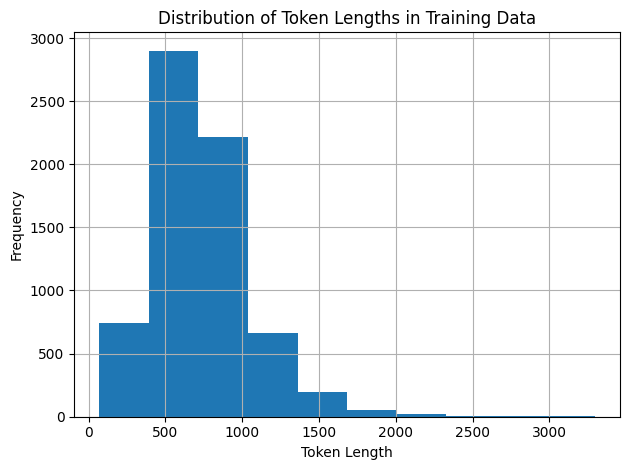

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

train_df['token_len'] = train_df['tokens'].apply(len)
train_df['token_len'].hist()

plt.title('Distribution of Token Lengths in Training Data')
plt.xlabel('Token Length')
plt.ylabel('Frequency')
plt.show()


# **2-Detailed information**

<div style="background-color:purple; color:white; padding:10px; border-radius: 5px;">
Train set

In [7]:
pd.set_option('display.max_columns', None)
def check_df(dataframe, head = 5):
    print("############################ Shape ############################")
    print(dataframe.shape)
    print("############################ Types ############################")
    print(dataframe.dtypes)
    print("############################ Na ############################")
    print(dataframe.isnull().sum())
    print("############################ Quantiles ############################")
    print(dataframe.describe().T)
check_df(train_df)

############################ Shape ############################
(6807, 8)
############################ Types ############################
document                int64
full_text              object
tokens                 object
trailing_whitespace    object
labels                 object
token_len               int64
label_freq             object
label_count             int64
dtype: object
############################ Na ############################
document               0
full_text              0
tokens                 0
trailing_whitespace    0
labels                 0
token_len              0
label_freq             0
label_count            0
dtype: int64
############################ Quantiles ############################
              count          mean          std   min      25%      50%  \
document     6807.0  14739.782283  4920.715769   7.0  11061.5  14818.0   
token_len    6807.0    733.441017   319.244697  69.0    520.0    693.0   
label_count  6807.0      1.272073     0.7038

<div style="background-color:purple; color:white; padding:10px; border-radius: 5px;">
test set

In [8]:
pd.set_option('display.max_columns', None)
def check_df(dataframe, head = 5):
    print("############################ Shape ############################")
    print(dataframe.shape)
    print("############################ Types ############################")
    print(dataframe.dtypes)
    print("############################ Na ############################")
    print(dataframe.isnull().sum())
    print("############################ Quantiles ############################")
    print(dataframe.describe().T)
check_df(test_df)

############################ Shape ############################
(10, 5)
############################ Types ############################
document                int64
full_text              object
tokens                 object
trailing_whitespace    object
token_len               int64
dtype: object
############################ Na ############################
document               0
full_text              0
tokens                 0
trailing_whitespace    0
token_len              0
dtype: int64
############################ Quantiles ############################
           count   mean         std    min    25%    50%     75%     max
document    10.0   62.7   46.142412    7.0   17.0   71.0  101.25   123.0
token_len   10.0  850.5  554.225435  225.0  542.0  647.5  991.50  1927.0


# **3-Text length**

**Graphs showing the lengths of the texts and how often each length was found in the data set were created and visualized as histogram and violin chart. The x-axis represents text lengths and the y-axis represents the frequency of these lengths**

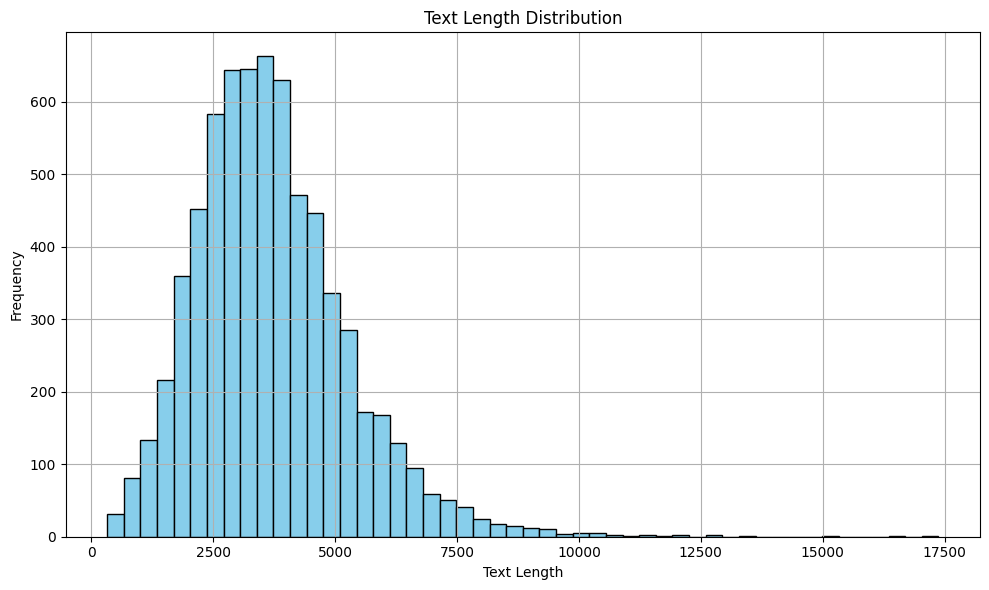

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Veri setini loadlama
train_df = pd.read_json('/kaggle/input/pii-detection-removal-from-educational-data/train.json')

# Metin uzunlukları
text_lengths = train_df['full_text'].apply(len)

# show
plt.figure(figsize=(10, 6))
plt.hist(text_lengths, bins=50, color='skyblue', edgecolor='black')
plt.title('Text Length Distribution')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


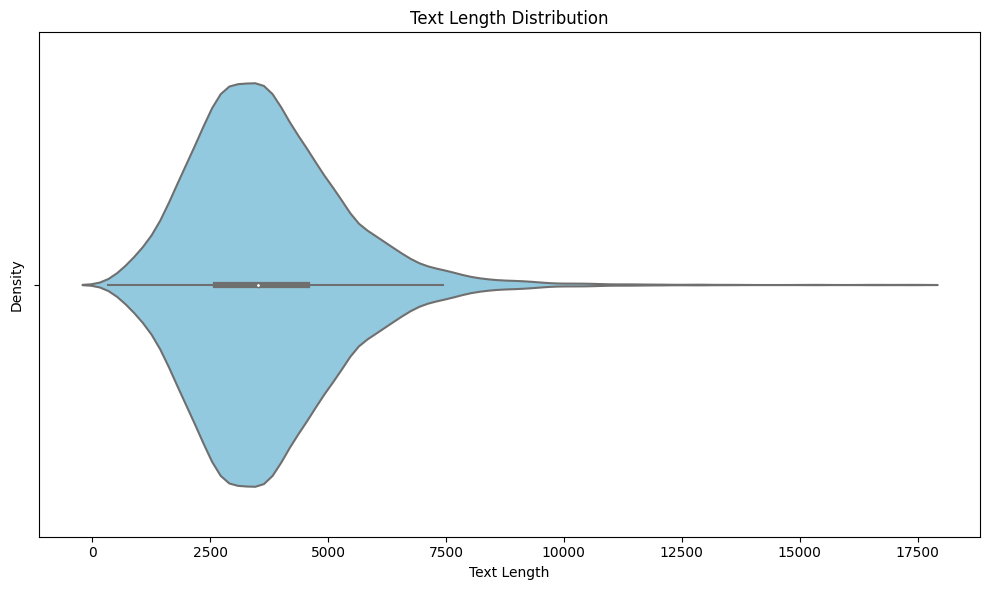

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

text_lengths = train_df['full_text'].apply(len)

# Metin uzunluklarını içeren violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x=text_lengths, color='skyblue')

# yazılar
plt.title('Text Length Distribution')
plt.xlabel('Text Length')
plt.ylabel('Density')
plt.show()


# **4-Relationships between text length and number of tags**

**shows how many tags the texts in the dataset contain. Each bar represents a frequency of the number of tags the texts contain.**

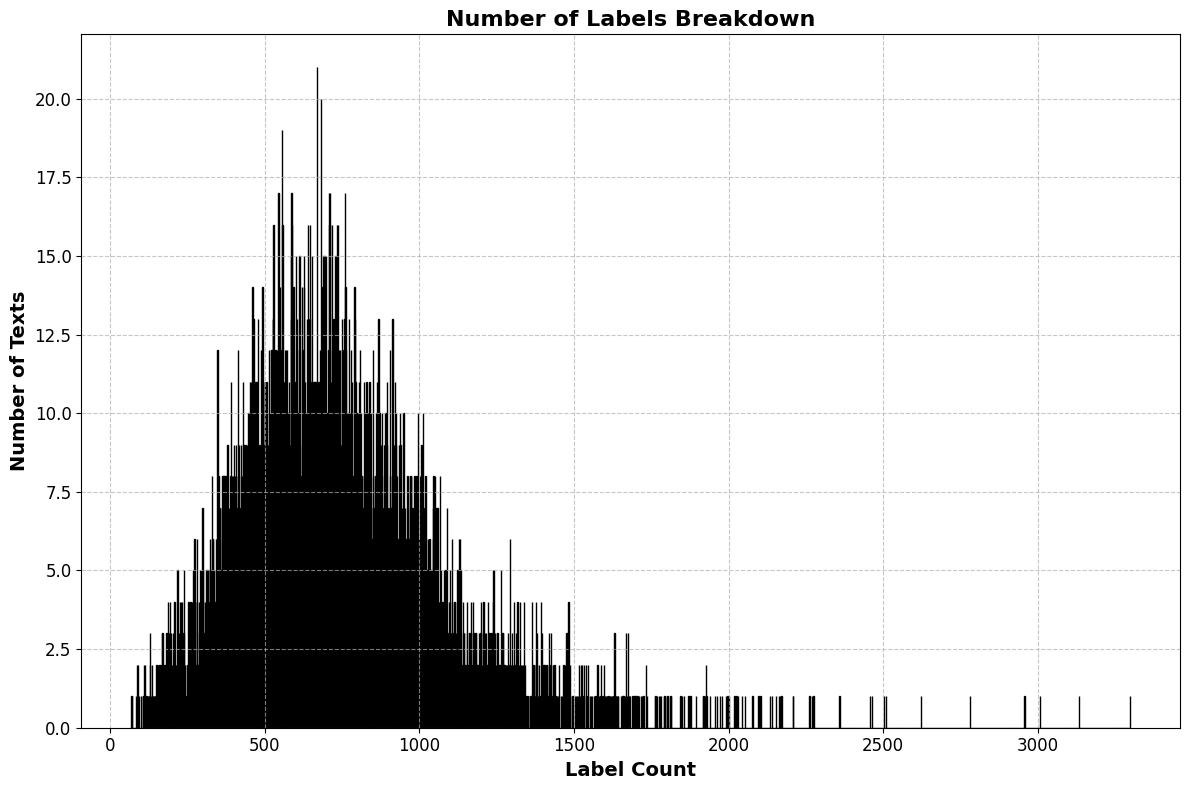

In [11]:
import matplotlib.pyplot as plt
from collections import Counter

# Etiket frekanslarını içeren sütun
train_df['label_freq'] = train_df['labels'].apply(Counter)

# Etiket sayısını içeren sütun
train_df['label_count'] = train_df['labels'].apply(lambda x: len(x))

# Histogram
plt.figure(figsize=(12, 8))
plt.hist(train_df['label_count'], bins=range(min(train_df['label_count']), max(train_df['label_count']) + 1), color='skyblue', edgecolor='black')
plt.xlabel('Label Count', fontsize=14, fontweight='bold')
plt.ylabel('Number of Texts', fontsize=14, fontweight='bold')
plt.title('Number of Labels Breakdown', fontsize=16, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

**shows the relationship between the length of texts and the number of tags they contain. Each point represents a text and shows the length of the text on the x-axis and the number of tags it contains on the y-axis. It is used, for example, to analyze how the number of tags changes as the length of texts increases, or if there is any other relationship between these two features.**

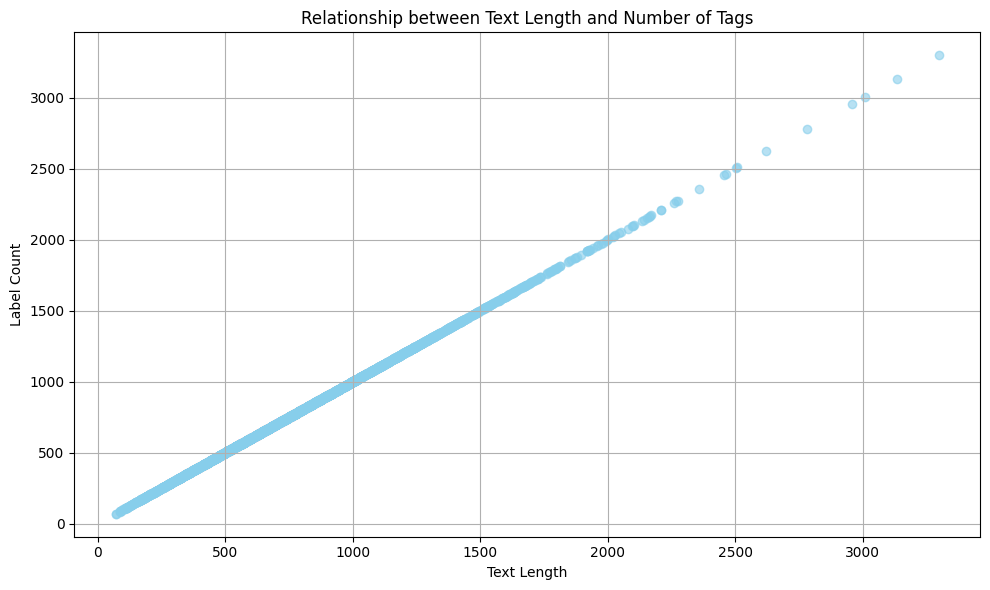

In [12]:
import matplotlib.pyplot as plt

# Metin uzunluğu ile etiket sayısı ilişkisini gösteren scatter plot
train_df['token_len'] = train_df['tokens'].apply(len)

plt.figure(figsize=(10, 6))
plt.scatter(train_df['token_len'], train_df['label_count'], color='skyblue', alpha=0.6)  
plt.title('Relationship between Text Length and Number of Tags')
plt.xlabel('Text Length')
plt.ylabel('Label Count')
plt.grid(True)
plt.show()


<h2 align="center" style="background-color:yellow;"  style="font-size:200%;"> Get all levels  </h2>

In [13]:
label_set = set()
for val in train_df.label_freq.values:
    data_dict = dict(val)
    for key in data_dict.keys():
        label_set.add( key )
label2idx = {key:i for i,key in enumerate(label_set)}
idx2label = {i:key for i,key in enumerate(label_set)}

<h2 align="center" style="background-color:yellow;"  style="font-size:200%;"> Label Distribution </h2>

In [14]:
lables_list = []
for key in train_df.label_freq.values:
    val_dict = dict( key )
    for val in val_dict.keys():
        lables_list.append( val )
label_dict = dict(Counter(lables_list))
total = sum(label_dict.values())
label_dict = {key: round((value/total) * 100 , 2)  for key, value in label_dict.items()}

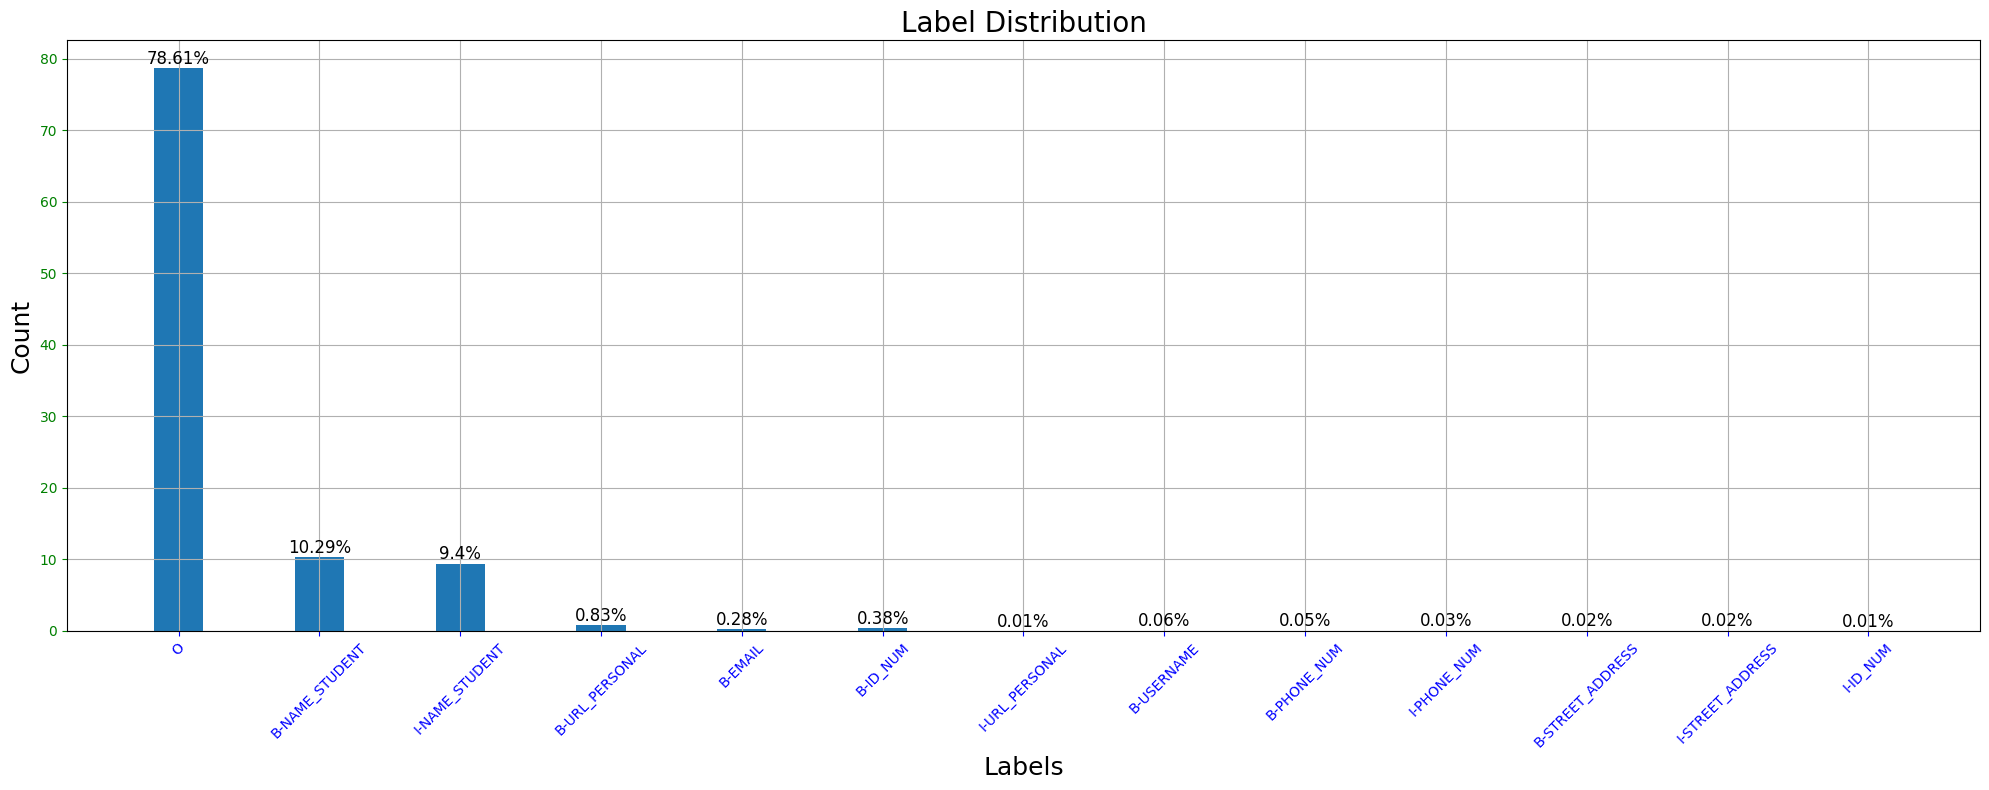

In [15]:
plt.rcParams["figure.figsize"] = (20,8)
width = 0.35
p1 = plt.bar( *zip(*label_dict.items()), width = 0.35,align='center')
for rect1 in p1:
    height = rect1.get_height()
    plt.annotate( "{}%".format(height),(rect1.get_x() + rect1.get_width()/2, height+.05),ha="center",va="bottom",fontsize=12)
plt.tick_params(axis='x', colors='blue')
plt.tick_params(axis='y', colors='green')
plt.xticks(rotation=45)
plt.xlabel('Labels', fontsize=18, )
plt.ylabel('Count',fontsize=18,)
plt.grid()
plt.title('Label Distribution', fontdict = {'fontsize' : 20})
plt.show()


<h2 align="center" style="background-color:yellow;"  style="font-size:200%;">This is a work in progress!! </h2>
